The fear of the LORD is the beginning of knowledge, but fools despise wisdom and discipline. Proverbs 1:7

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University

# 제 2 강 신경망을 내 손으로 만져보기(tf.keras & XOR)

---------



## AND 연산 

AND 연산은 모두 입력이 참일 때, 참을 결과로 출력하는 연산입니다.  다음의 진리표에 표시된 바와 같습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/truthtable.png?raw=true" width="600">
<center>그림 1:  OR, AND, NAND, XOR 진리표 </center>


이를 넘파이 배열로 나타내면 다음과 같습니다. 


In [1]:
import numpy as np
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], "float32") 
y = np.array([[0], [0], [0], [1]],  "float32")
print(x)
print(y)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [0.]
 [0.]
 [1.]]


또한 가중치와 편향도 정규 분포를 가지는 난수로 초기화 해줍니다. 또한, 학습률은 0.1로 설정하였습니다.  input값이 두개이므로, 가중치도 각각에 맞춰서 두개를 선언해줍니다.

In [2]:
import tensorflow as tf 
w = tf.random.normal([2], 0, 1)  # mean, std
b = tf.random.normal([1], 0, 1)  # mean, std
eta = 0.1   # learning rate
print(w)
print(b)

tf.Tensor([-0.86640704  1.44009   ], shape=(2,), dtype=float32)
tf.Tensor([-0.23903355], shape=(1,), dtype=float32)


이제 학습을 시켜보겠습니다. 앞에서 만든 편향을 가진 뉴런처럼 코드를 구성하면 됩니다. 각각 네가지 경우를 한번씩 학습할 때마다, 네가지 를 예측한 값과 실제 값의 차이인 error값의 합을 구해서 살펴보겠습니다.


In [4]:
def sigmoid(x): 
    return  1 / (1 + np.exp(-x))

In [5]:
for i in range(1000): 
    error_sum = 0 
    for j in range(4): 
        y_hat = sigmoid (np.sum(x[j] * w) + b) 
        error = y[j][0] - y_hat 
        w = w + eta * 1 * error * x[j]
        b = b + eta * 1 * error 
        error_sum += error 
    if i % 100 == 0: 
        print(i, error_sum)

0 [-0.95151484]
100 [-0.16347963]
200 [-0.10764188]
300 [-0.08082664]
400 [-0.0647271]
500 [-0.05392516]
600 [-0.04616952]
700 [-0.04033074]
800 [-0.0357811]
900 [-0.03213787]


이제 학습시켜서 나온 가중치와 편향을 사용하여 각각의 케이스를 예측해 보겠습니다.

In [6]:
for i in range(4): 
    print('X:', x[i], 'Y:', y[i], 'y_hat:', sigmoid(np.sum(x[i]*w) + b))


X: [0. 0.] Y: [0.] y_hat: [0.00018573]
X: [0. 1.] Y: [0.] y_hat: [0.04839294]
X: [1. 0.] Y: [0.] y_hat: [0.04866675]
X: [1. 1.] Y: [1.] y_hat: [0.9333522]


위와 같이, 실제로 1이 나와야하는 값은 1에 가깝게, 0에 가까워야하는 값은 0에 가깝게 예측이 되었습니다. `[0 0]` 케이스의 경우에는 다른 케이스들 보다 더 0에 가까운걸로 보아 더 확실한 케이스라는 점을 알 수 있습니다.

## OR 연산

OR 연산은 입력들 중에 하나라도 참이면, 참을 결과로 출력하는 연산입니다.  이를 넘파이 배열로 나타내면 다음과 같습니다. 

In [8]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], "float32") 
y = np.array([[0], [1], [1], [1]],  "float32")
print(x)
print(y)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [1.]]


이를 AND와 같은 가중치, 편향, 학습률 및 학습 모델로 학습을 시키면 다음과 같습니다. 

In [9]:
for i in range(1000): 
    error_sum = 0 
    for j in range(4): 
        y_hat = sigmoid (np.sum(x[j] * w) + b) 
        error = y[j][0] - y_hat 
        w = w + eta * 1 * error * x[j]
        b = b + eta * 1 * error 
        error_sum += error 
    if i % 100 == 0: 
        print(i, error_sum)

0 [1.9447308]
100 [0.07116947]
200 [0.02488196]
300 [0.01035471]
400 [0.00376951]
500 [0.00040788]
600 [-0.00139235]
700 [-0.00237067]
800 [-0.00289633]
900 [-0.00316517]


학습을 진행할 수록 error값의 합이 0에 가까워지는것을 확인할 수 있습니다. 각각의 케이스들을 해당 가중치와 편향으로 예측해보겠습니다.

In [10]:
for i in range(4): 
    print('X:', x[i], 'Y:', y[i], 'y_hat:', sigmoid(np.sum(x[i]*w) + b))

X: [0. 0.] Y: [0.] y_hat: [0.01864035]
X: [0. 1.] Y: [1.] y_hat: [0.99235314]
X: [1. 0.] Y: [1.] y_hat: [0.99231553]
X: [1. 1.] Y: [1.] y_hat: [0.9999988]


## XOR 연산
XOR은 AND나 OR연산과는 다르게 홀수 개의 입력이 참일 때, 결과가 참이 됩니다. 입력을 두개라고 한다면, 위의 진리표에 나타난 바와 같습니다.

이를 넘파이 배열로 나타내면 다음과 같습니다. 

In [ ]:
import numpy as np
import tensorflow as tf 

In [ ]:
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]],  "float32") 
y = np.array([[0], [1], [1], [0]],  "float32")

이를 AND와 같은 가중치, 편향, 학습률 및 학습 모델로 학습을 시키면 다음과 같습니다. 

In [12]:
for i in range(2000): 
    error_sum = 0 
    for j in range(4): 
        y_hat = sigmoid (np.sum(x[j] * w) + b) 
        error = y[j][0] - y_hat 
        w = w + eta * 1 * error * x[j]
        b = b + eta * 1 * error 
        error_sum += error 
    if i % 100 == 0: 
        print(i, error_sum)

0 [-0.00328542]
100 [-0.00331896]
200 [-0.00330157]
300 [-0.00325537]
400 [-0.00319251]
500 [-0.00312098]
600 [-0.00304543]
700 [-0.00296872]
800 [-0.00289285]
900 [-0.00281856]
1000 [-0.00274621]
1100 [-0.00267683]
1200 [-0.00261005]
1300 [-0.0025459]
1400 [-0.0024845]
1500 [-0.00242584]
1600 [-0.00236955]
1700 [-0.00231564]
1800 [-0.00226396]
1900 [-0.00221459]


위와 같이, 특정 학습 지점부터 에러 값이 0이 나와 버리고 있습니다. 이것이 과연 학습이 잘된걸까요? 계산된 가중치와 편향을 가지고 각 케이스를 계산해보았습니다.


In [11]:
for i in range(4): 
    print('X:', x[i], 'Y:', y[i], 'y_hat:', sigmoid(np.sum(x[i]*w) + b))

X: [0. 0.] Y: [0.] y_hat: [0.01864035]
X: [0. 1.] Y: [1.] y_hat: [0.99235314]
X: [1. 0.] Y: [1.] y_hat: [0.99231553]
X: [1. 1.] Y: [1.] y_hat: [0.9999988]


위와 같이, 결과가 0이 나와야하든지, 1이 나와야하든지, 모든 케이스가 0.5에 가깝게 나오고 있습니다. 이것은 원하던 결과가 아닙니다. 결과를 해석해보자면, 가중치와 편향 값은 모두 케이스 순서에 의존적이 된다는 것을 알 수 있습니다. 먼저 들어간 `[1 1]`이라는 케이스가 네번째에 들어가는 `[0 0]`이라는 케이스보다 영향을 준다는 것입니다. `[1 1]`이라는 케이스가 먼저 들어가서 가중치와 편향에 중대한 영향을 미치고 이 값들을 가지고 학습을 진행한다는 것이 문제입니다.

그러면 XOR문제는 풀지 못하는 걸까요? 여러 층의 퍼셉트론을 사용하면 해결이 됩니다.

### 단층 퍼셉트론에서의 XOR 문제점

인공 신경망에서는 단층 퍼셉트론으로 XOR 연산이 불가능하다는 것은 마빈 민스키 등에 의해서 밝혀졌습니다. 이러한 내용이 밝혀지면서 인공지능의 겨울이 찾아왔었습니다. 그야말로 전설같은 이야기로 잘 알려져 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-history.jpg?raw=true" width="900">
<center>그림 2: XOR 문제와 인공 지능의 발전사</center>

인공 신경망(ANN, Aritificial Neural Networks)은 1943년 신경생리학자 Warren McCulloch과 수학자 Walter Pitts가 'A Logical Calculus of Ideas Immanent In Nervous Activity' 처음 소개했습니다. 그 이후 1960년대까지 당싱에 등장한 인공 신경망을 통해 사람들은 지능을 가지 기계가 상당히 엄청난 일을 해낼 것이라 생각했습니다. 그러나, 위의 그림(출처: [beamandrew's blog](https://beamandrew.github.io/deeplearning/2017/02/23/deep_learning_101_part1.html))처럼 사람들의 기대와는 달리 인공 신경망으로 XOR문제를 해결할 수 없게 되었고, 인공 지능과 관련한 연구는 암흑기로 접어 들게 되었다. 그래도, 1990년 대에는 SVM과 성능이 좋은 다른 머신러닝 알고리즘들이 나올 정도도 꾸준한 연구가 진행은 되고 있었습니다. 

2000년대에 들어서면서 인공 신경망은 2012년 ILSVRC2012 대회에서 인공 신경망을 깊게 쌓은 딥러닝 모델인 AlexNet이 압도적인 성적으로 우승하면서 다시금 주목받게 되었습니다. 이렇게 인공 신경망에 기반을 둔 딥러닝이 다시 주목받게 된 계기가 되었습니다. 

인공 지능의 발전사에서 약간의 의미가 있었던 XOR 문제를 이제 어렵지 않게 풀어볼 수 있는 문제가 되었습니다. 

## XOR 연산 다층 신경망


<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-xor.png?raw=true" width="600">
<center>그림 2:  XOR 연산을 위한 다층 인공 신경망</center>

XOR 연산을 위한 2단의 Dense Layer로 구성하였습니다. Dense는 기본적인 레이어로, 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되어 있는 레이어입니다. Dense Layer는 아래와 같이 선언이 가능합니다.

```
tf.keras.layers.Dense()
```

각각의 Layer는 순차적으로 배치되어있습니다. 이를 Sequential 신경망이라고 합니다. 이것은 아래와 같이 선언합니다.
```
tf.keras.Sequential()
```

Sequential한 Dense Layer를 2층으로 쌓도록 합니다.

In [44]:
import numpy as np
import tensorflow as tf 

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)), 
    tf.keras.layers.Dense(8, activation='sigmoid'), 
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

순차적인 신경망안에 두개의 Dense Layer를 배치하고, 첫번째 Dense Layer는 2개의 뉴런을 선언하였고, 각 뉴런은 sigmoid를 활성함수로 가집니다. 입력 값은 두개이므로 모양이 (2,) 모양입니다. 두번째 Dense Layer는 1개의 뉴런을 선언하고, 마찬가지로 sigmoid 활성함수를 사용하였습니다.

XOR연산이므로, x와 y값은 그대로 입니다.

In [72]:
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]],  "float32") 
y = np.array([[0], [1], [1], [0]],  "float32")

이제는 model을 준비시키는 명령어를 사용하여 최적화 함수(optimizer)와 손실 함수(loss)를 정의합니다. 

In [73]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), # 'adam', 'sgd', ...
    loss='mse',   # 'mean_squared_error' 'binary_crossentropy'
    metrics=['accuracy'])

tf.keras에서는 다양한 최적화 함수와 손실 함수를 제공합니다. 그 중에서도 SGD(Stochastic Gradient Descent)는 확률적 경사 하강법이라고 합니다. 경사 하강법은 앞선 포스팅에서 설명하였고, 이 경사 하강법을 한번에 계산(전체 데이터세트를 사용)하지 않고 확률을 이용하여 부분적으로 나눠서 계산을 한다는 의미입니다.

SGD(Stochastic Gradient Descent)

- 기존의 경사 하강법은 데이터세트의 크기가 너무 커지면 계산이 오래 걸리는 단점이 있었습니다.
- SGD는 반복당 하나의 데이터(Batch=1)만을 사용하여 적은 계산으로 기울기를 얻어내는 방식입니다.
- 단점: 반복이 충분하면 효과는 좋지만, 노이즈가 심합니다. 최저점을 찾는다는 보장이 없습니다. 가능성만 높을 뿐입니다.
- 위의 단점을 극복하기 위해서 미니 배치 SGD가 있습니다. 배치를 너무 크게도 너무 작게도 잡지 않고 SGD보다 노이즈는 적게, 일반 경사 하강법보다는 효율적으로 찾는 방식입니다. 

손실 함수(Loss Function)은 RMSE의 제곱인 MSE를 사용하기로 합니다.

아래와 같이, summary() 메소드를 사용하여 형성된 신경망의 구조를 살펴볼 수 있습니다.

In [74]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


파라미터는 첫번째 Layer에서 입력값에 가중치가 곱해지고 편향이 더해져서 은닉층의 각 노드에 3개의 파라미터가 전달되어 총 6개입니다. 두번째 Layer에서는 첫 Layer에서 나온 출력 값 두개와 편향을 합쳐서 총 3개의 값이 두번째 층에 전달되어 결과적으로 하나의 출력(예측) 값이 나오게 됩니다.

In [79]:
history = model.fit(x, y, epochs=20000, batch_size=1, verbose = 0)
#print(model.evaluate(x, y))

학습을 진행하면 위와 같은 출력이 나오며, 손실 값을 알려줍니다. 손실 값은 학습을 진행할수록 0에 가까워지는 것을 확인할 수 있습니다.

이제 제대로 학습이 되었는지 확인해봅니다. 아래의 코드를 통해서 x에 대한 예측 값을 출력 받을 수 있습니다.

In [80]:
print(model.predict(x))
# print(model.predict_classes(x))

[[0.5258435]
 [0.5258435]
 [0.5258435]
 [0.5258435]]


정답은 0, 1, 1, 0 순서입니다. 각각 0과 1에 해당하는 수에 가깝게 나오고 있는것을 확인 할 수 있습니다. 이는 학습을 더 많이 할수록 더 정답에 해당하는 수치로 갈것 입니다.

이제는 가중치와 편향 값을 확인해봅니다.

In [50]:
for weight in model.weights: 
    print(weight)

<tf.Variable 'dense_9/kernel:0' shape=(2, 16) dtype=float32, numpy=
array([[-1.8383033 ,  2.002077  , -0.15336403,  0.17284101,  0.40487793,
        -0.39525723,  0.894477  ,  0.19128728, -0.963422  ,  0.661773  ,
         0.21490027, -0.12429199,  0.32307467, -0.32486495,  0.4248714 ,
         0.35300758],
       [ 1.8383809 , -2.0019991 ,  0.027582  ,  0.4018159 ,  0.36233777,
         0.04373157, -0.89447284,  0.1680474 ,  0.96346265, -0.07535206,
         0.18341437,  0.0245843 , -0.323068  ,  0.25839257, -0.13547379,
         0.35302055]], dtype=float32)>
<tf.Variable 'dense_9/bias:0' shape=(16,) dtype=float32, numpy=
array([-1.06409745e-04, -3.34489450e-05, -2.87178047e-02, -1.75003061e-06,
       -3.62346560e-01, -4.74123955e-02, -1.76793710e-05,  1.11435475e-06,
       -3.74453484e-05,  4.57547575e-01, -7.41923986e-06, -2.46842932e-02,
       -2.57454326e-06, -5.60296621e-06,  5.21387041e-01, -3.53024423e-01],
      dtype=float32)>
<tf.Variable 'dense_10/kernel:0' shape=(16, 8)

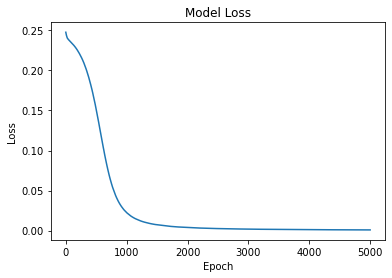

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

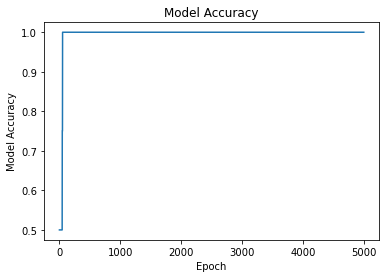

In [52]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Model Accuracy')
plt.show()

## Tweaking the model.
- increasing the number of hidden layers or nodes 
- trying to use different activation functions or optimizer
- using different batch sizes, 1 or 4

In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

#### Question: Is it possible to solve XOR with no activation function at all?

In [55]:
def linear(x):
    '''
    The function returns the variable that is passed in, so all types work.
    '''
    return x

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(32, activation='linear', input_shape=(2,)), 
    tf.keras.layers.Dense(1, activation='linear')
])

In [ ]:
def linear(x):
    '''
    The function returns the variable that is passed in, so all types work.
    '''
    return x

-------
__Be joyful always!__ 1 Thes.5:16